In [0]:
# Install the latest Tensorflow version.
!pip3 install --quiet "tensorflow>=1.7"
# Install TF-Hub.
!pip3 install --quiet tensorflow-hub
!pip3 install seaborn
from IPython.display import clear_output
clear_output()

In [0]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os, re
from google.colab import files
import pandas as pd
import seaborn as sns
from IPython.display import clear_output
clear_output()

In [0]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/3"

In [0]:
embed = hub.Module(module_url)
clear_output()

In [0]:
# inicio a sessao do tensorflow
session = tf.Session()

session.run(tf.global_variables_initializer())  # variavel padrao
session.run(tf.tables_initializer())  # variavel padrao

# Calcula os embeddings do input
input_placeholder = tf.placeholder(tf.string, shape=(None))  # variavel padrao
similarity_message_encodings = embed(input_placeholder)  # variavel padrao

clear_output()

In [0]:
messages = [
    # Smartphones
    "I like my phone",
    "My phone is not good.",
    "Your cellphone looks great.",

    # Weather
    "Will it snow tomorrow?",
    "Recently a lot of hurricanes have hit the US",
    "Global warming is real",

    # Asking about age
    "How old are you?",
    "what is your age?",
]

embeddings = session.run(similarity_message_encodings, feed_dict={input_placeholder: messages})

In [0]:
def plot_similarity(labels, features, rotation):
  sns.set(font_scale=1.2)
  corr = np.inner(features, features)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      annot=True,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Similaridade")
  plt.savefig('aisummit.png')
  #files.download('aisummit.png')

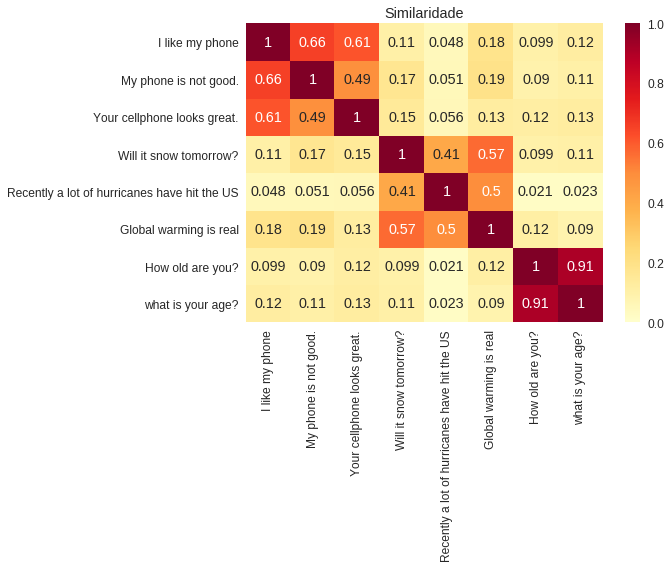

In [76]:
plot_similarity(messages, embeddings, 90)